In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Madhuri\class\EDA\archive (7).zip", compression='zip')
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [3]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

 Analyzing Best-Seller Trends Across Product Categories

1

In [4]:
ct = pd.crosstab(df['category'], df['isBestSeller'])

# Add proportion of best-sellers per category
ct['Total'] = ct.sum(axis=1)
ct['BestSeller_Proportion'] = ct[1] / ct['Total']  # assuming isBestSeller is 0/1
ct_sorted = ct.sort_values('BestSeller_Proportion', ascending=False)

print("Crosstab with proportion of best-sellers per category:")
display(ct_sorted[['BestSeller_Proportion']])

Crosstab with proportion of best-sellers per category:


isBestSeller,BestSeller_Proportion
category,
Grocery,0.058135
Smart Home Security & Lighting,0.057692
Health & Personal Care,0.057686
Mobile Phone Accessories,0.042471
Power & Hand Tools,0.035339
...,...
"CD, Disc & Tape Players",0.000000
General Music-Making Accessories,0.000000
Snowboard Boots,0.000000


In [5]:
from scipy.stats import chi2_contingency
import numpy as np

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))
print(f"Chi-square test statistic: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")

# Cramér's V for strength of association
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(ct.shape)-1)))
print(f"Cramér's V: {cramers_v:.3f}")

Chi-square test statistic: 36540.203
p-value: 0.000
Degrees of freedom: 295
Cramér's V: 0.071


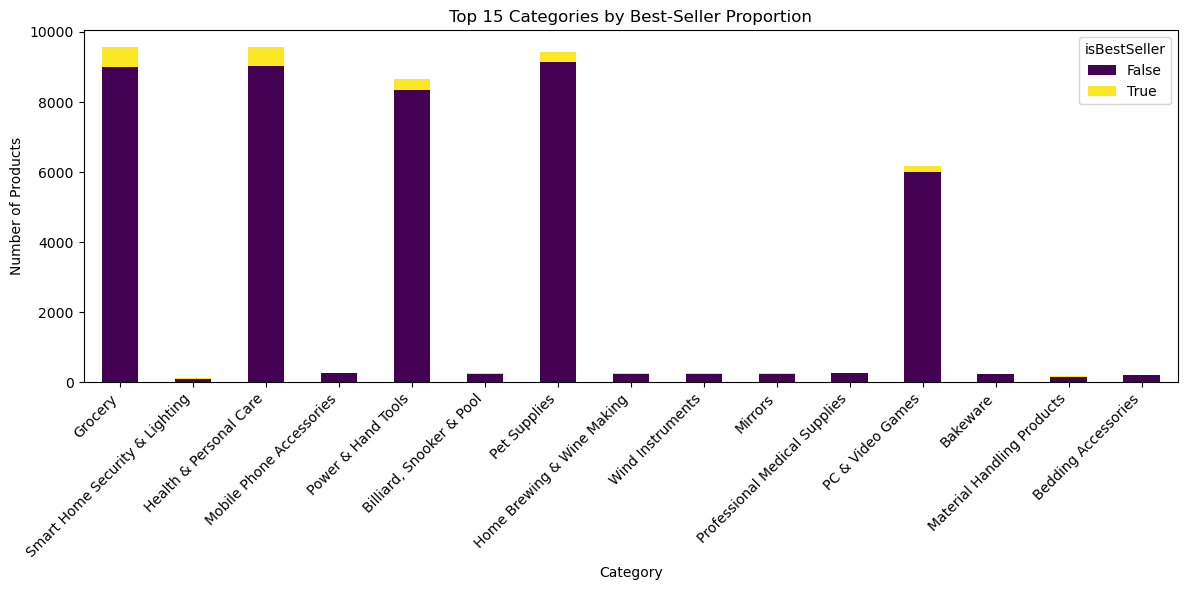

In [7]:
top_categories = ct_sorted.head(15).index  # top 15 categories by best-seller proportion
stacked_data.loc[top_categories].plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Top 15 Categories by Best-Seller Proportion")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Exploring Product Prices and Ratings Across Categories and Brands

2

In [8]:
# Ensure price is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter data: remove outliers
price_filter = (df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)
df_no_outliers = df[price_filter].copy()

print(f"Removed {df.shape[0] - df_no_outliers.shape[0]} outliers from price data")

Removed 327688 outliers from price data


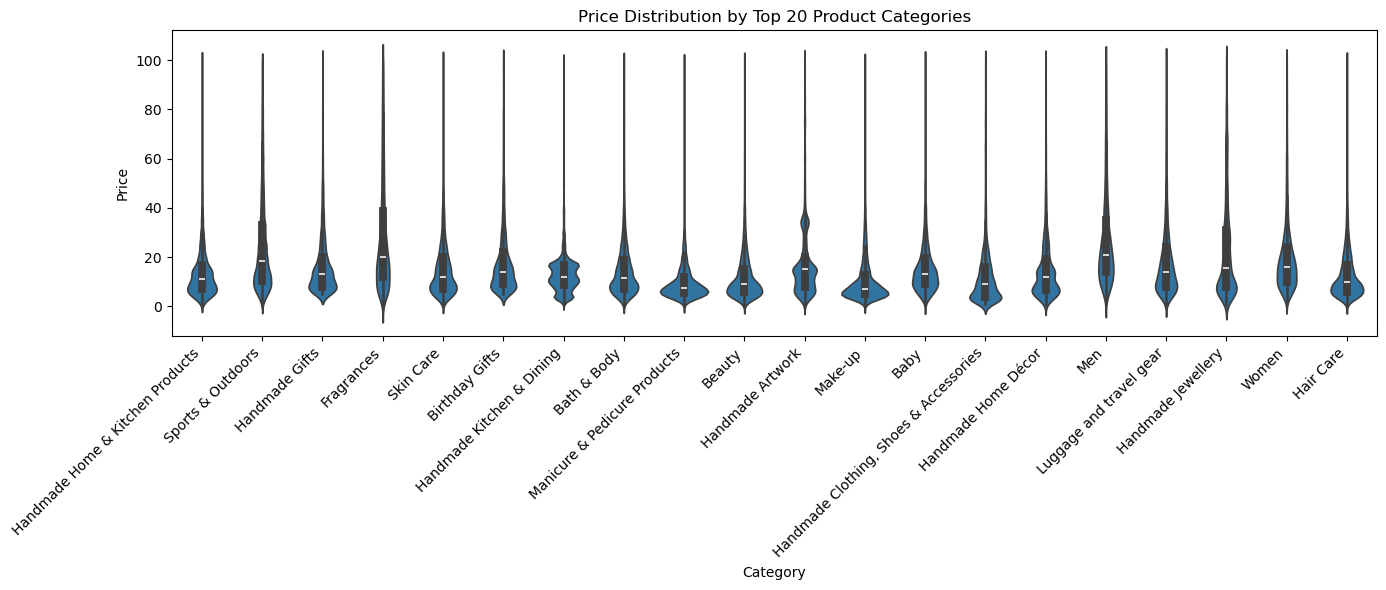

Top 5 categories by median price:
category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64


In [10]:
# Top 20 categories by count
top20_categories = df_no_outliers['category'].value_counts().head(20).index

plt.figure(figsize=(14,6))
sns.violinplot(x='category', y='price', data=df_no_outliers[df_no_outliers['category'].isin(top20_categories)])
plt.xticks(rotation=45, ha='right')
plt.title("Price Distribution by Top 20 Product Categories")
plt.ylabel("Price")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# Highest median price across all categories
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print("Top 5 categories by median price:")
print(median_prices.head(5))

Top 5 categories by average price:
category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64


C:\Users\Naveen\AppData\Local\Temp\ipykernel_14624\416631290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.loc[top10_categories].index, y=avg_prices.loc[top10_categories].values, palette='magma')


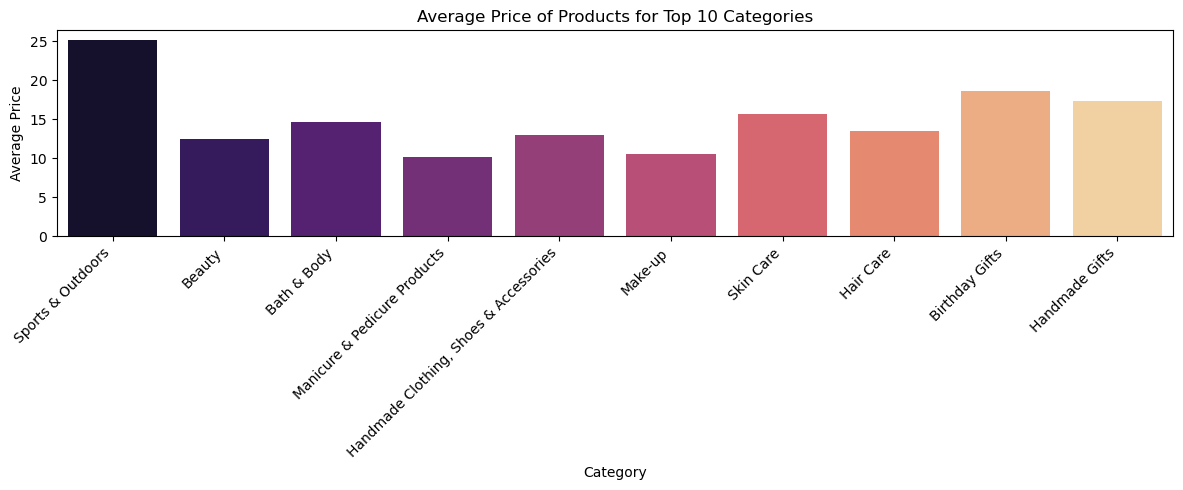

In [11]:
top10_categories = df_no_outliers['category'].value_counts().head(10).index

avg_prices = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
print("Top 5 categories by average price:")
print(avg_prices.head(5))

plt.figure(figsize=(12,5))
sns.barplot(x=avg_prices.loc[top10_categories].index, y=avg_prices.loc[top10_categories].values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title("Average Price of Products for Top 10 Categories")
plt.ylabel("Average Price")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

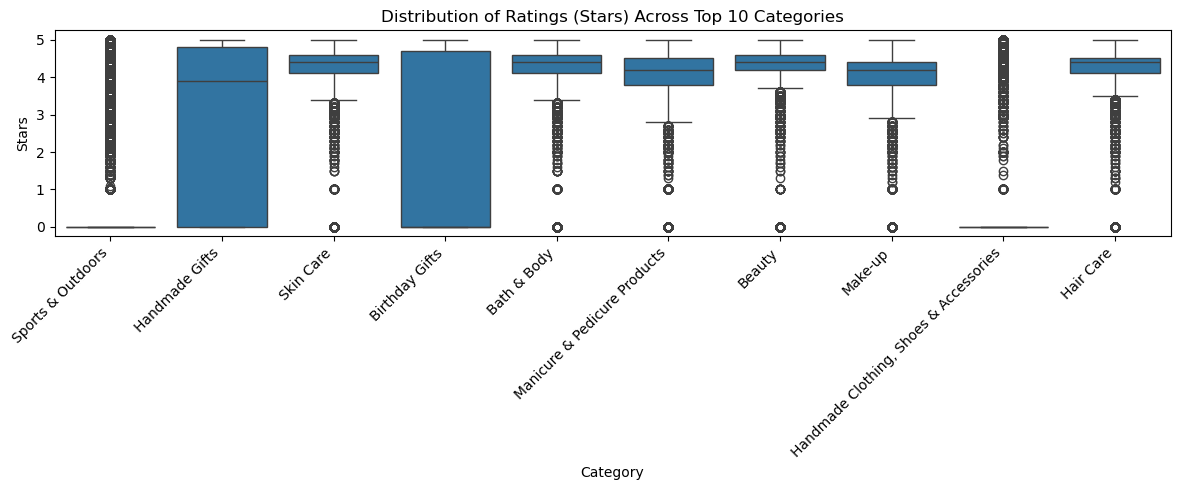

Top 5 categories by median rating:
category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Name: stars, dtype: float64


In [12]:
# Ensure stars are numeric
df_no_outliers['stars'] = pd.to_numeric(df_no_outliers['stars'], errors='coerce')

# Top 10 categories by count
top10_categories = df_no_outliers['category'].value_counts().head(10).index

plt.figure(figsize=(12,5))
sns.boxplot(x='category', y='stars', data=df_no_outliers[df_no_outliers['category'].isin(top10_categories)])
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Ratings (Stars) Across Top 10 Categories")
plt.ylabel("Stars")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# Highest median rating across all categories
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
print("Top 5 categories by median rating:")
print(median_ratings.head(5))

 Investigating the Interplay Between Product Prices and Ratings


3

In [13]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop missing values
data = df[['price','stars']].dropna()

# Pearson correlation
corr = data['price'].corr(data['stars'])
print(f"Correlation coefficient between price and stars: {corr:.3f}")

Correlation coefficient between price and stars: -0.125


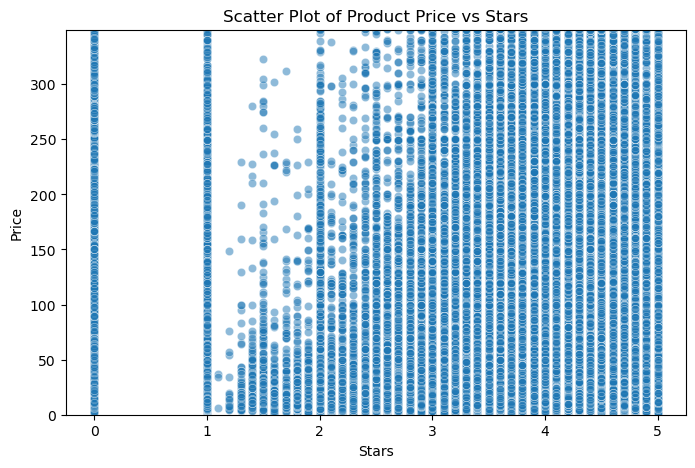

In [14]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='stars', y='price', data=data, alpha=0.5)
plt.title("Scatter Plot of Product Price vs Stars")
plt.xlabel("Stars")
plt.ylabel("Price")
plt.ylim(0, data['price'].quantile(0.95))  # optional: remove extreme outliers for clarity
plt.show()

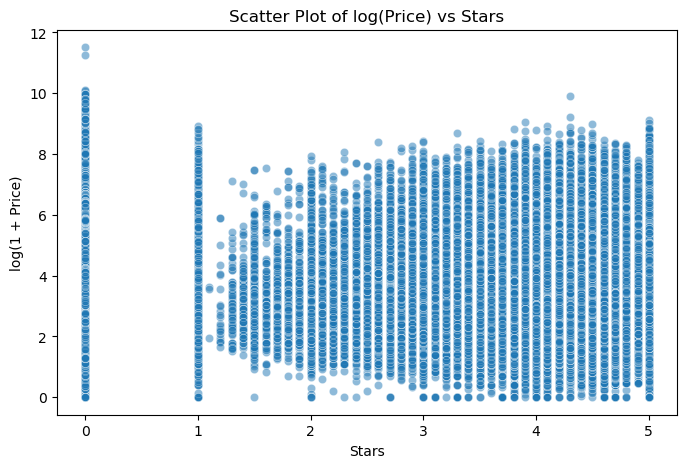

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='stars', y=np.log1p(data['price']), data=data, alpha=0.5)
plt.title("Scatter Plot of log(Price) vs Stars")
plt.xlabel("Stars")
plt.ylabel("log(1 + Price)")
plt.show()


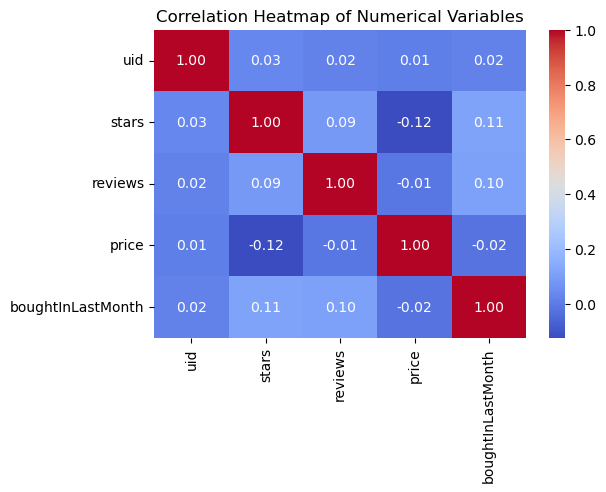

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

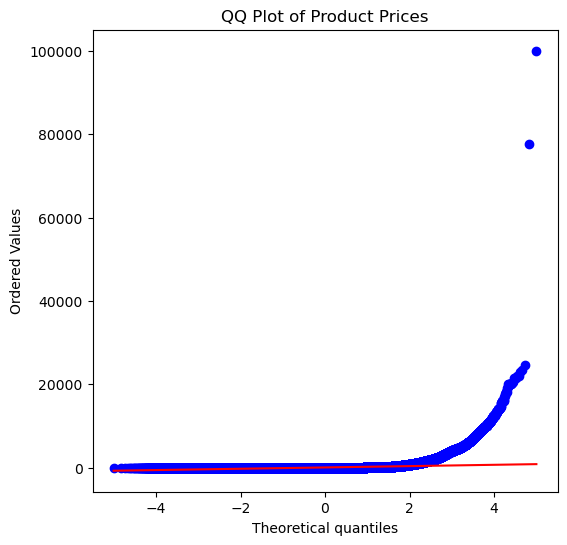

In [20]:
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(df['price'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()